Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

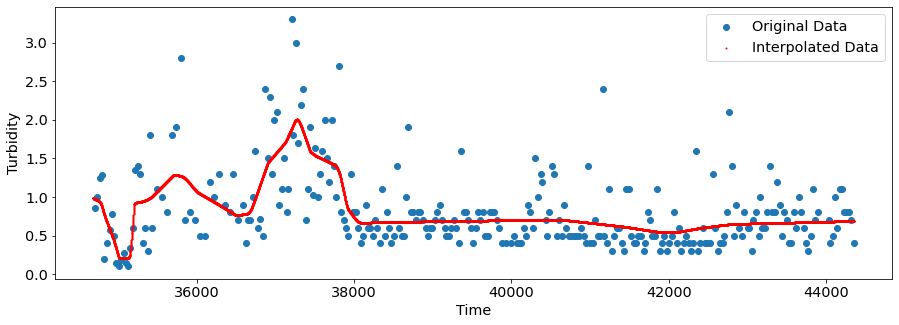

313/313 [==============================] - 0s 321us/step - loss: 1.6987e-16
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation/Turbidity/saved_model/my_modelBB05A AC01_Turbidity')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/Turbidity_data/BB05A AC01.csv")
time = df['time'].values
turbidity = df['turbidity'].values
df

#Transform the normalized scale to real scale
turbidity_min = 0.1
turbidity_max = 3.3
time_min = 34708.00                
time_max = 44354.46                        

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(turbidity_max - turbidity_min) + turbidity_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, turbidity*(turbidity_max - turbidity_min) + turbidity_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Turbidity')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.078681699
,0.084797931
,0.091121493
,0.097445055
,0.103768617
,0.110092179
,0.116519406
,0.122635638
,0.1289592
,0.138496376
,0.141606324
,0.147929886
,0.154357114
,0.160473346
,0.166796908
,0.17312047
,0.179444032
,0.185767594
,0.192194821
,0.539161415
,0.545484977
,0.955687192
,0.958797141
,0.962010755
])
interpolation

array([[0.29472587],
       [0.31339604],
       [0.3330539 ],
       [0.35277772],
       [0.37006167],
       [0.3680605 ],
       [0.3605274 ],
       [0.3430316 ],
       [0.31957856],
       [0.29369095],
       [0.28812143],
       [0.27682015],
       [0.26535308],
       [0.2544409 ],
       [0.24277255],
       [0.23096457],
       [0.2191565 ],
       [0.2066325 ],
       [0.20968655],
       [0.18676698],
       [0.18702152],
       [0.18012777],
       [0.18042001],
       [0.18072197]], dtype=float32)